In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1.10

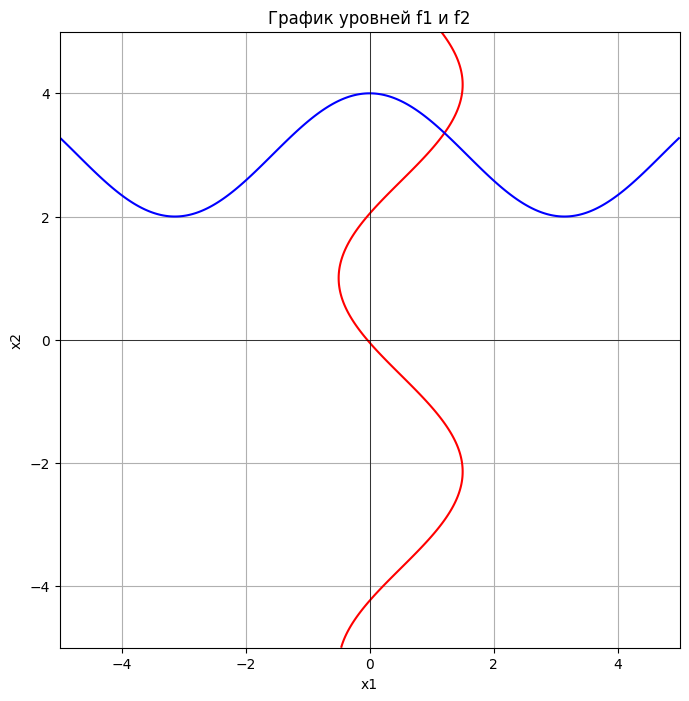

In [6]:
x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

def f1(x1, x2):
    return np.cos(x2 - 1) + x1 - 0.5

def f2(x1, x2):
    return x2 - np.cos(x1) - 3

F1 = f1(X1, X2)
F2 = f2(X1, X2)

plt.figure(figsize=(8, 8))
plt.contour(X1, X2, F1, levels=[0], colors='r')
plt.contour(X1, X2, F2, levels=[0], colors='b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title("График уровней f1 и f2")
plt.show()



In [7]:
def f(x):
    x1, x2 = x
    return np.array([f1(x1, x2), f2(x1, x2)])

def J(x):
    x1, x2 = x
    return np.array([
        [1, -np.sin(x2 - 1)],
        [np.sin(x1), 1]
    ])

def newton_method(x0, eps):
    x = x0
    iteration = 0
    while True:
        iteration += 1
        delta = np.linalg.solve(J(x), -f(x))
        x = x + delta
        if np.linalg.norm(delta) < eps:
            break
    return x, iteration


In [8]:
initial_guesses = [np.array([0, 2]), np.array([-3, 2]), np.array([3, 2])]

results = []
for guess in initial_guesses:
    root, num_iterations = newton_method(guess, 1e-5)
    results.append((root, num_iterations))

for result in results:
    print(f"Корень: {result[0]}, Количество итераций: {result[1]}")


Корень: [1.20690682 3.35591174], Количество итераций: 5
Корень: [1.20690682 3.35591174], Количество итераций: 6
Корень: [1.20690682 3.35591174], Количество итераций: 6


In [10]:
from scipy.optimize import fsolve

roots_fsolve = []
for guess in initial_guesses:
    root = fsolve(f, guess)
    roots_fsolve.append(root)

print("Корни, найденные fsolve:")
for root in roots_fsolve:
    print(root)


Корни, найденные fsolve:
[1.20690682 3.35591174]
[1.20690682 3.35591174]
[1.20690682 3.35591174]


# 4.5.4

Ближайшая точка: [4.24754483 0.15118552 3.24763804]
Расстояние до ближайшей точки: 15.719828848114062


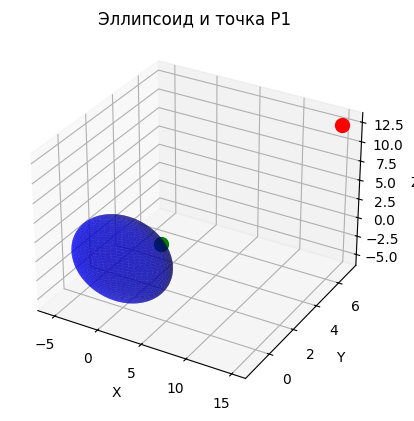

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

# Эллипсоидные параметры
a, b, c = 5.5, 1.3, 5.2

# Функция расстояния до эллипсоида
def distance_to_ellipse(point):
    def func(x):
        return np.sqrt((x[0] - point[0])**2 + (x[1] - point[1])**2 + (x[2] - point[2])**2)
    def cons(x):
        return (x[0]/a)**2 + (x[1]/b)**2 + (x[2]/c)**2 - 1  # Условие лежания на эллипсоиде
    x0 = np.array([a, b, c])  # начальное приближение
    res = minimize(func, x0, constraints={'type': 'eq', 'fun': cons})
    return res.fun, res.x  # возвращаем расстояние и точку на эллипсоиде

P1 = np.array([15, 7, 12.445])
dist, nearest_point = distance_to_ellipse(P1)

print("Ближайшая точка:", nearest_point)
print("Расстояние до ближайшей точки:", dist)

# Визуализация
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones_like(u), np.cos(v))

# Поверхность эллипсоида
ax.plot_surface(x, y, z, color='b', alpha=0.6)
# Точка P1
ax.scatter(*P1, color='r', s=100)
# Ближайшая точка
ax.scatter(*nearest_point, color='g', s=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Эллипсоид и точка P1')
plt.show()


# 5.1.12


## Step 1

In [19]:
def gauss_elimination(A, b):
    n = len(b)
    M = A.copy()
    Y = b.copy()
    
    for i in range(n):
        # Делаем элемент M[i][i] главным (преобразуем строку)
        div = M[i][i]
        M[i, :] /= div
        Y[i] /= div
    
        # Обнуляем элементы в столбце i ниже M[i][i]
        for j in range(i + 1, n):
            mult = M[j][i]
            M[j, :] -= mult * M[i, :]
            Y[j] -= mult * Y[i]
    
    # Обратный ход
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = Y[i] - np.dot(M[i, i+1:], x[i+1:])

    return x

# Тестовые данные
A = np.array([
    [9.9, 3.0, 4.0, 0.0, 1.3, 1.5],
    [1.98, 9.8, 0.8, 5.94, 0.42, -0.6],
    [3.96, -4.8, 19.7, 9.9, 0.72, 0.3],
    [1.98, 1.2, 1.1, 6.93, 0.81, -1.2],
    [9.9, -7.5, 2.1, -9.9, 29.5, 0.0],
    [-2.97, -1.2, 0.8, 4.95, 2.7, 12.7]
], dtype=float)
b = np.array([-73.34, -37.456, -126.316, -82.528, 96.66, 7.41], dtype=float)

# Решение методом Гаусса
x_gauss = gauss_elimination(A, b)
print("Решение методом Гаусса:", x_gauss)


Решение методом Гаусса: [-10.12121212   4.2          1.6        -10.21212121   4.2
   1.6       ]


## Step 2

In [20]:
def transform_system(A, b):
    n = len(A)
    B = np.zeros_like(A)
    c = np.zeros(n)
    
    for i in range(n):
        for j in range(n):
            if i != j:
                B[i, j] = -A[i, j] / A[i, i]
        
        c[i] = b[i] / A[i, i]
    
    return B, c

B, c = transform_system(A, b)
if np.linalg.norm(B, ord=np.inf) < 1:
    print("Условие сходимости выполнено.")
else:
    print("Сходимость не гарантирована.")


Условие сходимости выполнено.


## Step 3

In [21]:
def zeid(A, b, x0, max_iter=10):
    n = len(b)
    x = x0.copy()
    for _ in range(max_iter):
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

    return x

# Начальное приближение
x0 = np.zeros(len(b))
x_zeid = zeid(A, b, x0)
print("Решение методом Зейделя:", x_zeid)
print("Абсолютная погрешность:", np.linalg.norm(x_zeid - x_gauss, ord=np.inf))


Решение методом Зейделя: [-10.11957257   4.20029992   1.60008514 -10.21247455   4.19940139
   1.60067138]
Абсолютная погрешность: 0.0016395492240111054


## Step 4

In [24]:
x0_new = np.array([7, 7, 7, 7, 7, 7], dtype=float)
x_zeid_new = zeid(A, b, x0_new)
print("Решение методом Зейделя с новым начальным приближением:", x_zeid_new)
print("Абсолютная погрешность с новым начальным приближением:", np.linalg.norm(x_zeid_new - x_gauss, ord=np.inf))


Решение методом Зейделя с новым начальным приближением: [-10.11759457   4.19988875   1.59948344 -10.21312119   4.19845888
   1.60158542]
Абсолютная погрешность с новым начальным приближением: 0.0036175554042827684


Абсолютная погрешность между этими двумя методами показывает насколько близко итерационный метод подошел к точному решению. Выбор начального приближения может сильно влиять на результаты итерационных методов, о чем свидетельствуют различия в решениях и погрешностях для разных начальных приближений.


# 5.4.6

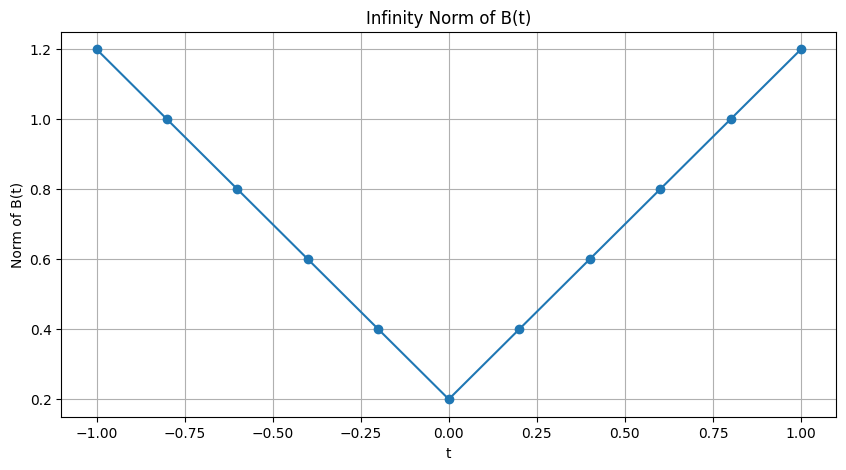

In [25]:
def matrix_norm_infinity(B):
    return np.max(np.sum(np.abs(B), axis=1))

ts = np.arange(-1, 1.1, 0.2)  # Массив значений t
norms = []  # Для хранения норм

for t in ts:
    B = np.array([[t, 0.1], [0.2, t]])
    norm = matrix_norm_infinity(B)
    norms.append(norm)

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(ts, norms, marker='o')
plt.xlabel('t')
plt.ylabel('Norm of B(t)')
plt.title('Infinity Norm of B(t)')
plt.grid(True)
plt.show()


In [26]:
eps = 1e-5
t_max = None

# Ищем максимальное t, при котором сходимость гарантирована
for t, norm in zip(ts, norms):
    if norm < 1:
        t_max = t

if t_max is not None:
    B = np.array([[t_max, 0.1], [0.2, t_max]])
    c = np.array([1, 1])
    x = np.array([0, 0])  # Начальное приближение
    iteration = 0

    while True:
        x_new = np.dot(B, x) + c
        if np.linalg.norm(x_new - x, np.inf) < eps:
            break
        x = x_new
        iteration += 1

    print("Решение найдено при t =", t_max, ":", x)
    print("Количество итераций:", iteration)
else:
    print("Условие сходимости не выполнено ни для одного из значений t.")


Решение найдено при t = 0.7999999999999996 : [14.99988044 19.99983091]
Количество итераций: 194
